# Proyecto integrado

## Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

In [1]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Parte 1. Descripción de los Datos



### Diccionario de datos

**games_csv** cada fila corresponde a un video juego:

- `Name`: Nombre.
- `Platform`: Plataforma.
- `Year_of_Release`: Año de lanzamiento.
- `Genre`: Género.
- `NA_sales`: ventas en Norteamérica en millones de dólares estadounidenses.
- `EU_sales`: ventas en Europa en millones de dólares estadounidenses.
- `JP_sales`:ventas en Japón en millones de dólares estadounidenses.
- `Other_sales`: ventas en otros países en millones de dólares estadounidenses. 
- `Critic_Score`: máximo de 100. 
- `User_Score`: máximo de 10.
- `Rating`: (ESRB).
    - E (Everyone): Apropiado para todas las edades.
    - E10+ (Everyone 10 and older): Apropiado para mayores de 10 años.
    - T (Teen): Apropiado para mayores de 13 años. Puede contener violencia, temas sugestivos, humor grosero, sangre mínima, insinuaciones de contenido sexual y/o lenguaje fuerte.
    - M (Mature): Apropiado para mayores de 17 años. Puede contener violencia intensa, sangre y gore, contenido sexual y/o lenguaje fuerte.
    - AO (Adults Only): Solo para adultos mayores de 18 años. Puede contener contenido sexual explícito, violencia extrema y/o lenguaje muy fuerte.
    - EC (Early Childhood): Apropiado para niños pequeños. Diseñado para niños de 3 años en adelante y no contiene material que los padres encontrarían inapropiado.
    - K-A (Kids to Adults): Anteriormente utilizado, ahora reemplazado por la clasificación "E". Significaba que el juego era adecuado para niños y adultos.
    - RP (Rating Pending): Clasificación pendiente. Se utiliza cuando un juego aún no ha sido clasificado oficialmente por la ESRB.

In [2]:
#Leer conjunto de datos
df_games = pd.read_csv('games.csv')

In [3]:
#mostrar información del dataframe
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
display(df_games)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Conclusiones:

- los encabezados deben estar en minúsculas;
- los valores de las columnas no están guardados en los valores que les corresponden;
- cuenta con valores ausentes.


## Parte 2. Preparar datos

Preparamos los datos para ser analizados.

In [5]:
#Cambiar nombres de columnas a minúsculas
df_games.columns

def nombres_a_minusculas(df):
    # Obtener los nombres de las columnas actuales
    columnas = df.columns
    
    # Crear una lista con los nombres de columnas en minúsculas
    columnas_minusculas = [columna.lower() for columna in columnas]
    
    # Asignar los nuevos nombres de columnas al DataFrame
    df.columns = columnas_minusculas
    
    return df

df_games= nombres_a_minusculas(df_games)

print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [18]:
#Verificar filas duplicadas
display(df_games.duplicated().sum())

#Aseguramos que todos los valores de fecha se puedan trabajar como datos numéricos e ignorámos los inválidos por NaN.
df_games['year_of_release'] = pd.to_numeric(df_games['year_of_release'], errors= 'coerce')

type_y= df_games['year_of_release'].dtype

#Imprimimos el tipo de dato para cada columna
print(F'La columna "year_of_release" contiene datos tipo: {type_y}')



0

La columna "year_of_release" contiene datos tipo: float64


In [20]:
#Corregir valores de 'user_score' a tipo float
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)
df_games['user_score'] = df_games['user_score'].astype('float')

df_games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

### Revisión valores ausentes

In [7]:
#Valores nulos de 'name'
display(df_games[df_games['name'].isna()])

#Valores nulos de 'genre'
display(df_games[df_games['genre'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
# Eliminar filas con valores NaN en la columna 'name' y 'rating' 
df_games = df_games.dropna(subset=['name'])

# Eliminar filas con valores NaN en la columna 'year_of_release'
df_games = df_games.dropna(subset= ['year_of_release'])

In [21]:
#Verificar cuantos valores NaN quedan por columna
100*df_games.isna().sum()/df_games.shape[0]

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.453418
user_score         54.615665
rating             40.598395
total_sales         0.000000
dtype: float64

In [24]:
#Buscamos relación entre las tres columnas critic_score, user_score y rating.

#filtered_nan_cscore= df_games[df_games['critic_score'].isna()]

#filtered_nan_uscore = df_games[df_games['critic_score'].isna() & df_games['user_score'].isna()]

filtered_nan_scores_and_rating= df_games[df_games['critic_score'].isna() & df_games['user_score'].isna() & df_games['rating'].isna()]

display(filtered_nan_scores_and_rating)

100*filtered_nan_scores_and_rating.shape[0]/df_games.shape[0]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


40.014594989053755

In [15]:
#Añadir columna de 'total_sales' al dataframe.

df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

display(df_games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [53]:
#Comprobamos si tenemos valores duplicados en nombre de video juego
display(df_games['name'].value_counts())


years = df_games['year_of_release'].unique()
count_years = len(years)

count_years
#value_counts().sort_index()

name
Need for Speed: Most Wanted               12
LEGO Marvel Super Heroes                   9
Ratatouille                                9
FIFA 14                                    9
Terraria                                   8
                                          ..
Loving Life with Hello Kitty & Friends     1
Scrabble (Others sales)                    1
Viva Pinata: Party Animals                 1
Sands of Destruction                       1
Haitaka no Psychedelica                    1
Name: count, Length: 11426, dtype: int64

37

Conclusiones:

- Eliminamos las filas que contienen valores nulos en la columna "year_of_release" ya que representan el 2% de los datos, por lo que no es una cantidad significativa.
- Eliminamos las filas que contienen valores nulos en la columna "name" y "genre" ya que sólo cuenta con 2 juegos, por lo que no es una cantidad significativa.
- Las columnas critic_score, user_score, rating cuentan con muchos valores NaN por lo que no podemos eliminarlas, debemos averiguar si tienen alguna relación.
- Tenemos 6580 filas con valores ausentes en las columnas 'critic_score', 'user_score' y 'rating' y corresponde al 40% de los datos.
- Contamos con valores duplicados en la columna 'name'.
- Mentendremos los valores NaN ya que la proporción de los valores ausentes es bastante grande para evitar alterar la distribución.


## Parte 3. Analiza los datos

- ¿Cuántos juegos fueron lanzados por año? ¿son significativos los datos de cada periodo?
- ¿Cómo varían las ventas de una plataforma a otra? Elegir plataformas con mayores ventas totales y construye una distribución basada en los datos de cada año. ¿Existen plataformas que solían ser populares y que ahora ya no tienen ventas? ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?


,year_of_release,name
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


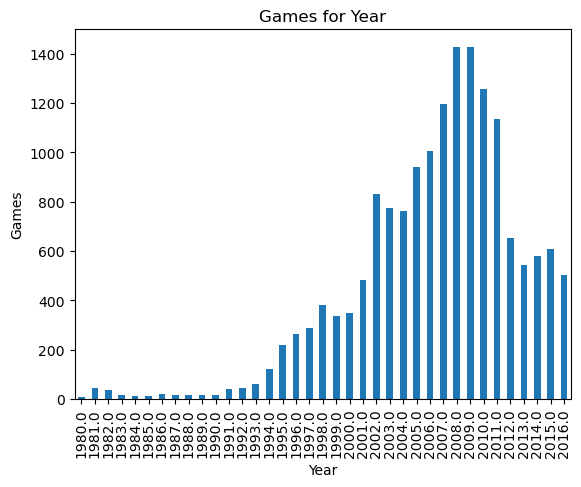

In [72]:
#Juegos lanzados por año
games_for_year= df_games.groupby('year_of_release')['name'].size().reset_index()
display(games_for_year.sort_index())

games_for_year.plot(x='year_of_release',
        kind='bar',
        title='Games for Year',
        xlabel='Year',
        ylabel='Games',
        legend=False)

plt.show()


In [85]:
#Ventas por plataforma

platform_sales = df_games.groupby('platform')['total_sales'].sum().reset_index()
#['name'].count().reset_index()

display(platform_sales.sort_values(by= 'total_sales', ascending=False).head())

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
